# **Face Clustering:**

---
## **Encoding faces**
---

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=cd23c4383dc5ecfd6a114f9c5747fec5e0b5ea740b6ea03319313f65ef282f7c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
from google.colab.patches import cv2_imshow
from imutils import paths
import face_recognition
import glob
import cv2
import os

### *Recognizing and Encoding the faces numerically, each with a 128-D feature vector*

In [ ]:
from google.colab import files
upload = files.upload()

Saving download001.jpg to download001.jpg
Saving download002.jpg to download002.jpg
Saving download003.jpg to download003.jpg
Saving download004.jpg to download004.jpg
Saving download005.jpg to download005.jpg
Saving download006.jpg to download006.jpg
Saving download007.jpg to download007.jpg
Saving download008.jpg to download008.jpg
Saving download009.jpg to download009.jpg
Saving download010.jpg to download010.jpg
Saving download011.jpg to download011.jpg
Saving download012.jpg to download012.jpg
Saving download013.jpg to download013.jpg
Saving download014.jpg to download014.jpg
Saving download016.jpg to download016.jpg
Saving download017.jpg to download017.jpg
Saving download018.jpg to download018.jpg
Saving download019.jpg to download019.jpg
Saving download020.jpg to download020.jpg
Saving download021.jpg to download021.jpg
Saving download028.jpg to download028.jpg
Saving download029.jpg to download029.jpg
Saving download030.jpg to download030.jpg
Saving download031.jpg to download

In [ ]:
data = []

#for file in glob.glob(path):
for file in upload:
  print("[INFO] processing image {}".format(file))
  image = cv2.imread(file)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb, model = "cnn")
  # computing the facial embedding for the face
  encodings = face_recognition.face_encodings(rgb, boxes)
  # building a dictionary of the image path, bounding box location, and encodings for the current image
  d = [{"imagePath": file, "loc": box, "encoding": enc} for (box, enc) in zip(boxes, encodings)]
  data.extend(d)

  #cv2_imshow(image)
  #cv2_imshow(rgb)
  #print(boxes)
  #print(encodings)

[INFO] processing image download001.jpg
[INFO] processing image download002.jpg
[INFO] processing image download003.jpg
[INFO] processing image download004.jpg
[INFO] processing image download005.jpg
[INFO] processing image download006.jpg
[INFO] processing image download007.jpg
[INFO] processing image download008.jpg
[INFO] processing image download009.jpg
[INFO] processing image download010.jpg
[INFO] processing image download011.jpg
[INFO] processing image download012.jpg
[INFO] processing image download013.jpg
[INFO] processing image download014.jpg
[INFO] processing image download016.jpg
[INFO] processing image download017.jpg
[INFO] processing image download018.jpg
[INFO] processing image download019.jpg
[INFO] processing image download020.jpg
[INFO] processing image download021.jpg
[INFO] processing image download028.jpg
[INFO] processing image download029.jpg
[INFO] processing image download030.jpg
[INFO] processing image download031.jpg
[INFO] processing image download032.jpg


---
## **Clustering the faces**
---

In [ ]:
from google.colab.patches import cv2_imshow
from sklearn.cluster import DBSCAN
from imutils import build_montages
import numpy as np

### *Preparing the Data and Face Encodings for clustering*

In [ ]:
# converting the data into a numpy array
np_data = np.array(data)
# extracting the 128-d facial encodings and placing them in a list
np_encodings = [item["encoding"] for item in np_data]

### *Clustering the Face Encodings using DBSCAN*

In [ ]:
print("[INFO] clustering...")
# initializing the clustering object
cluster = DBSCAN(metric = "euclidean", n_jobs = -1)
# fitting the clustering model on the encoded data
cluster.fit(np_encodings)

[INFO] clustering...


DBSCAN(n_jobs=-1)

### *Determining the number of unique faces recognized from the input data*

In [ ]:
labelIDs = np.unique(cluster.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] No. of unique faces: {}".format(numUniqueFaces))
print("[INFO] Label IDs: {}, where [-1] refers to unidentified faces or outliers".format(labelIDs))

[INFO] No. of unique faces: 7
[INFO] Label IDs: [-1  0  1  2  3  4  5  6], where [-1] refers to unidentified faces or outliers


### *Visualizing the images belonging to each unique labelID after clustering the faces*

[INFO] faces for face ID: -1


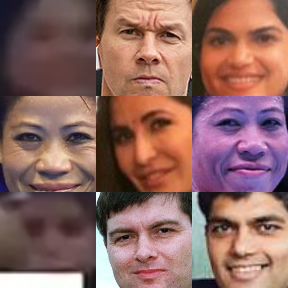

[INFO] faces for face ID: 0


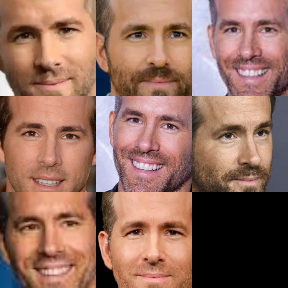

[INFO] faces for face ID: 1


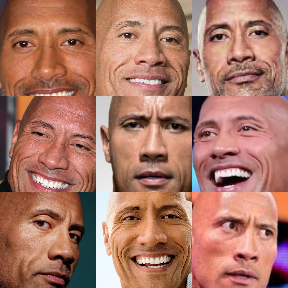

[INFO] faces for face ID: 2


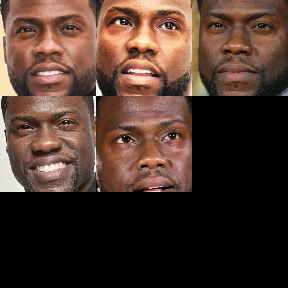

[INFO] faces for face ID: 3


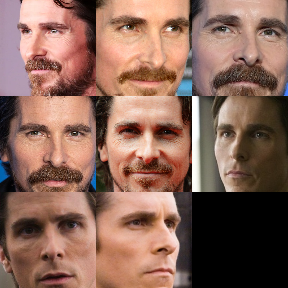

[INFO] faces for face ID: 4


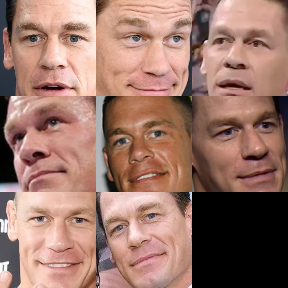

[INFO] faces for face ID: 5


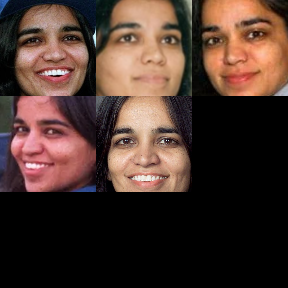

[INFO] faces for face ID: 6


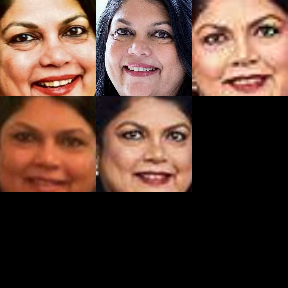

In [ ]:
# loop over the unique face integers
for labelID in labelIDs:
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = np.where(cluster.labels_ == labelID)[0]
  idxs = np.random.choice(idxs, size = min(15, len(idxs)), replace = False)
  # initialize the list of faces to include in the montage
  faces = []

  for i in idxs:
    # load the input image and extract the face ROI
    current_image = cv2.imread(np_data[i]["imagePath"])
    (top, right, bottom, left) = np_data[i]["loc"]
    current_face = current_image[top:bottom, left:right]
    # force resize the face ROI to 96x96 and then add it to the faces montage list
    current_face = cv2.resize(current_face, (96, 96))
    faces.append(current_face)

  # create a montage using 96x96 "tiles" with 5 rows and 5 columns
  montage = build_montages(faces, (96, 96), (3, 3))[0]

  # show the output montage
  # current_title = "Face ID #{}".format(labelID)
  # current_title = "Unknown Faces" if labelID == -1 else current_title
  cv2_imshow(montage)